Analysis

We can conclude from our study that the average tumor volume in mice treated by Capomulin was the second lowest (40.68 mm3) out of all of  the drugs tested. 

The final tumor volume in mice treated with Capomulin and Ramicane were much lower than the final tumor volume in mice treated with Infubinol and Ceftamin. 

Taking a random sample of a mouse treated by Capomulin, we observed that the tumor size decreased from 45 mm3 at the beginning of the study, to 41.5 at the end of the study. 

Capomulin was tested on 230 mice, the most of all the drugs tested. This higher sample size might have an effect on the outcome of the study. 



In [642]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [644]:
#preview mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [646]:
#preview study data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [648]:
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')
# Display the merged data
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [650]:
#find the amount of unique mice IDs in the data
mouse_count = merged_data['Mouse ID'].value_counts()
mouse_count = len(mouse_count)
mouse_count

249

In [652]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint = merged_data['Timepoint'].value_counts()
timepoint

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: count, dtype: int64

In [654]:
#since I found out that there are 249 unique mice IDs and there are 250 with a Timepoint of 0
#this means that the duplicate mice ID must have a Timepoint of 0 so I located all rows where the Timepoint=0
timepoint_zero = merged_data.loc[merged_data['Timepoint']==0]
timepoint_zero

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [656]:
#then did a value count on the mice IDs where the Timepoint is 0 and found that there are 2 entries for 'g989'
mouse_id = timepoint_zero['Mouse ID'].value_counts()
mouse_id

Mouse ID
g989    2
b128    1
l558    1
s166    1
x773    1
       ..
e584    1
e213    1
j755    1
s565    1
m601    1
Name: count, Length: 249, dtype: int64

In [658]:
#from the above value count, i can tell that mouse ID 'g989' is the duplicate that needs to be removed
#now i will find all rows with the duplicate mouse ID and the data associated with that mouse ID
duplicate_mouse_ID = merged_data.loc[merged_data['Mouse ID']=='g989',:]
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [660]:
#this will create a clean dataframe with the rows containing mouse ID 'g989' removed
#this is confirmed by the row count dropping from 1893 in the original (merged) dataframe to 1880 in my new (clean) dataframe

clean_df = merged_data.loc[merged_data['Mouse ID']!='g989',:]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [662]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_df['Mouse ID'].value_counts()
mouse_count_clean = len(mouse_count_clean)
mouse_count_clean

248

In [664]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_gb = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = mouse_gb.mean()
median = mouse_gb.median()
variance = mouse_gb.var()
std = mouse_gb.std()
sem = mouse_gb.sem()
pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev.':std,
    'Tumor Volume Std. Err.':sem
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [666]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':['mean','median','var','std','sem']
})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

In [669]:
bar_chart_data = clean_df['Drug Regimen'].value_counts().reset_index()
bar_chart_data

,Drug Regimen,count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


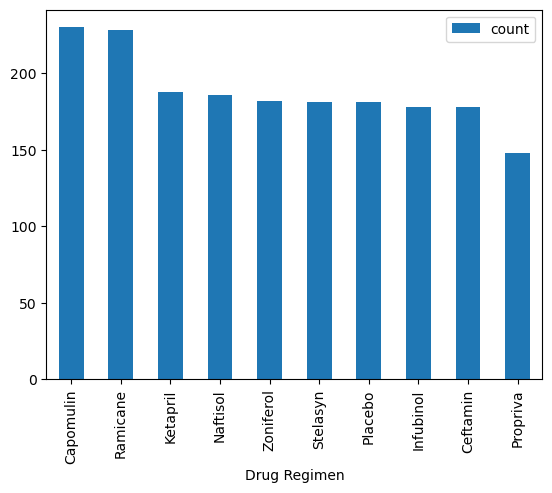

In [671]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data.plot.bar(x='Drug Regimen',y='count')
plt.show()

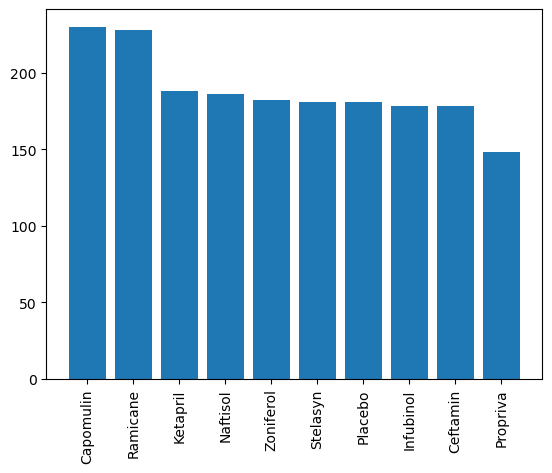

In [673]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_chart_data['Drug Regimen'],bar_chart_data['count'])
plt.xticks(rotation=90)
plt.show()


In [675]:
pie_chart_data = clean_df['Sex'].value_counts().reset_index()
print(pie_chart_data)

      Sex  count
0    Male    958
1  Female    922


<function matplotlib.pyplot.show(close=None, block=None)>

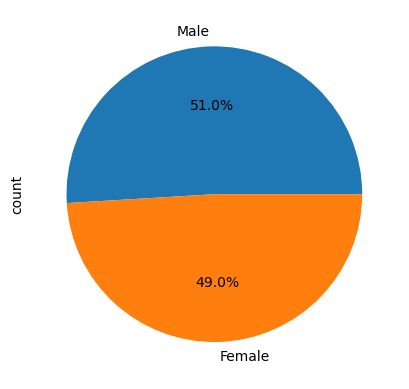

In [684]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_df.Sex.value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.show

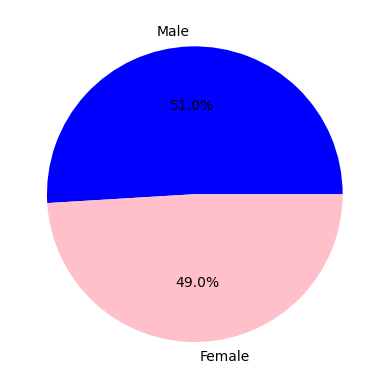

In [679]:
labels = pie_chart_data['Sex']
values = pie_chart_data['count']
colors = ['blue', 'pink']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

Quartiles, Outliers and Boxplots

In [625]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#list of regimens being evaluated:

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

highest_timpoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

#Create a DataFrame with the last timepoint for each mouse

highest_timpoint_df=pd.DataFrame(highest_timpoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_value = pd.merge(highest_timpoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')

#filter the DataFrame to include only the regimens being evaluated:

final_tumor_value = final_tumor_value[final_tumor_value['Drug Regimen'].isin(treatments)]

#display the DataFrame showing the final tumor values of each mouse accross the 4 regimens being evaluated:

final_tumor_value.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [540]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_value.loc[final_tumor_value['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset of tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #Determine the lower and upper bounds to identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
    #View results
    print(f"{treatment}'s potential outliers: {tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]}")
          

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


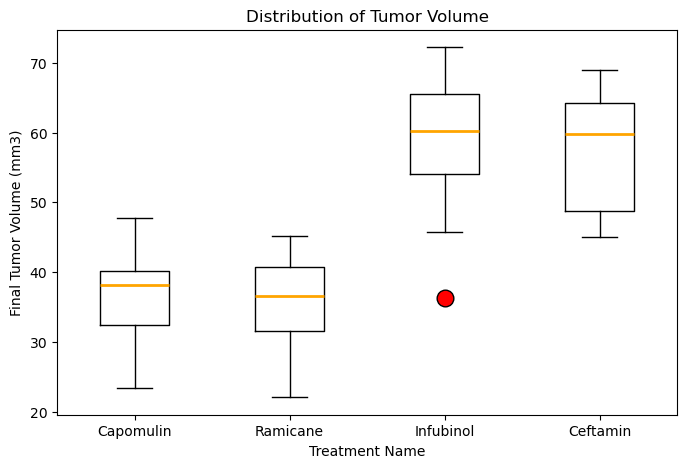

In [542]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8,5))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', 
                markerfacecolor='red', markersize=12),
                medianprops=dict(color='orange', linewidth=2))
plt.title('Distribution of Tumor Volume')
plt.xlabel('Treatment Name')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()



Line and Scatter Plots

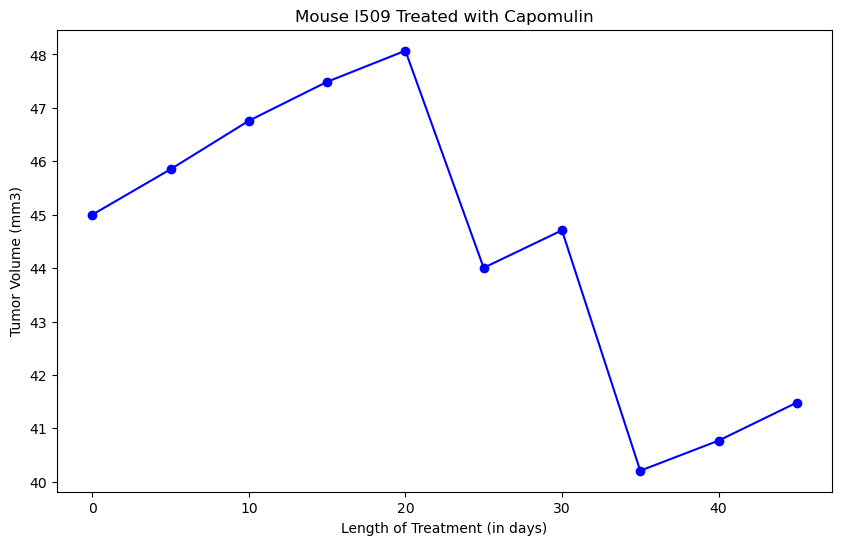

In [545]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#chose a mouse ID
mouse_id = 'l509'

#filtering to show only the chosen mouse and the results of them being given Capomulin as a treatment
mouse_data_capomulin = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10,6))
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title(f'Mouse l509 Treated with Capomulin')
plt.xlabel('Length of Treatment (in days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

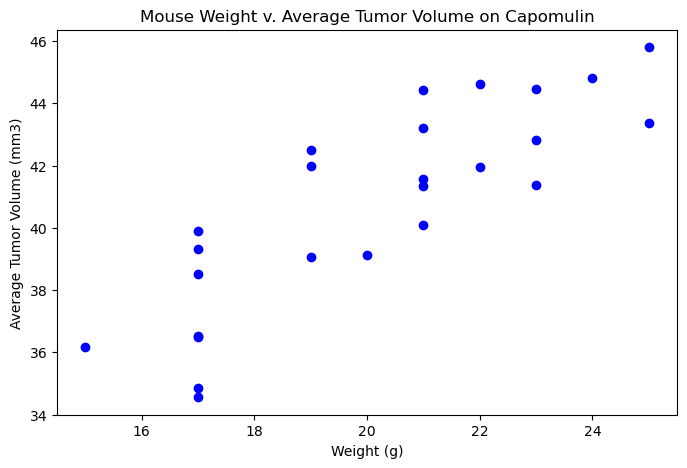

In [547]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_vol = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Merge the average_vol data with the original mouse metadata to get the weight of each mouse
capomulin_data = pd.merge(average_vol, mouse_metadata, on='Mouse ID')

#Scatter plot of mouse weight v. average tumor volume
plt.figure(figsize=(8,5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight v. Average Tumor Volume on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show


Correlation and Regression

COrrelation coefficient: 0.8419363424694721
Slope: 0.9544396890241049
Intercept:21.552160532685008
R-squared value:0.7088568047708723


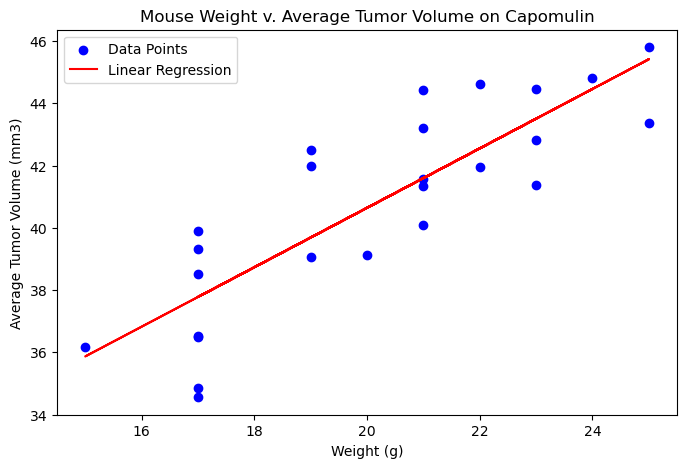

In [556]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient, _ = pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print(f'COrrelation coefficient: {correlation_coefficient}')

#linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print(f'Slope: {slope}')
print(f'Intercept:{intercept}')
print(f'R-squared value:{rvalue**2}')

plt.figure(figsize=(8,5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', label='Linear Regression')

plt.title('Mouse Weight v. Average Tumor Volume on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.legend()
plt.show()


